In [1]:
import pandas as pd
import os

In [2]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')
store_data = pd.read_csv('data/stores.csv')
feature_data = pd.read_csv('data/features.csv')

In [3]:
# train_data.columns
train_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
# store_data.columns
store_data.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [5]:
# feature_data.columns
feature_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [6]:
feature_data.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [7]:
# Approximate CPI & Unemployment by using mean
from statistics import mean
feature_data['CPI'] = feature_data['CPI'].fillna(feature_data['CPI'].mean())
feature_data['Unemployment'] = feature_data['Unemployment'].fillna(feature_data['CPI'].mean())

In [8]:
# Impute these features with 0
feature_data['MarkDown1'] = feature_data['MarkDown1'].fillna(0)
feature_data['MarkDown2'] = feature_data['MarkDown2'].fillna(0)
feature_data['MarkDown3'] = feature_data['MarkDown3'].fillna(0)
feature_data['MarkDown4'] = feature_data['MarkDown4'].fillna(0)
feature_data['MarkDown5'] = feature_data['MarkDown5'].fillna(0)

In [9]:
feature_data.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

In [10]:
# Merge tables feature_data and train_data on common features.
merged_data = pd.merge(feature_data, train_data, on=['Store','Date','IsHoliday'])

merged_data = pd.merge(merged_data, store_data, on=['Store'])

In [11]:
merged_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50,A,151315
1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,50605.27,A,151315
2,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,3,13740.12,A,151315
3,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,4,39954.04,A,151315
4,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,5,32229.38,A,151315


In [12]:
merged_data = merged_data.sort_values(by='Date')

In [13]:
merged_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50,A,151315
330761,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,3,14612.19,B,103681
330762,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,4,26323.15,B,103681
330763,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,5,36414.63,B,103681
330764,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,6,11437.81,B,103681


In [14]:
merged_data.shape

(421570, 16)

In [15]:
# Exploratory Data Analysis

grouped_data = merged_data.groupby('Type')
sizes = grouped_data.count().round(1)
sizes

merged_data['Type'].value_counts()

A    215478
B    163495
C     42597
Name: Type, dtype: int64

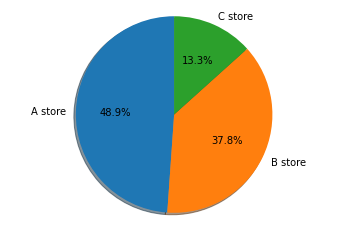

In [16]:
# ! pip install matplotlib
import matplotlib.pyplot as plt
labels = 'A store','B store','C store'
sizes = [(22/(45))*100,(17/(45))*100,(6/(45))*100]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

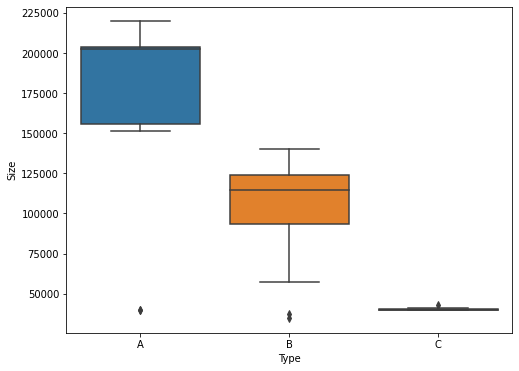

In [17]:
# ! pip install seaborn
# boxplot for sizes of types of stores
import seaborn as sns
store_type = pd.concat([store_data['Type'], store_data['Size']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Size', data=store_type)

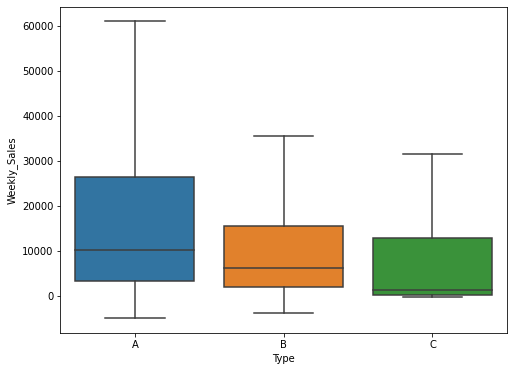

In [18]:
# boxplot for weekly sales for different types of stores
store_sale = pd.concat([merged_data['Type'], merged_data['Weekly_Sales']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Weekly_Sales', data=store_sale, showfliers=False)

In [19]:
# total count of sales on holidays and non holidays
print('sales on non-holiday : ', merged_data[merged_data['IsHoliday']==False]['Weekly_Sales'].count().round(1))
print('sales on holiday : ', merged_data[merged_data['IsHoliday']==True]['Weekly_Sales'].count().round(1))

sales on non-holiday :  391909
sales on holiday :  29661


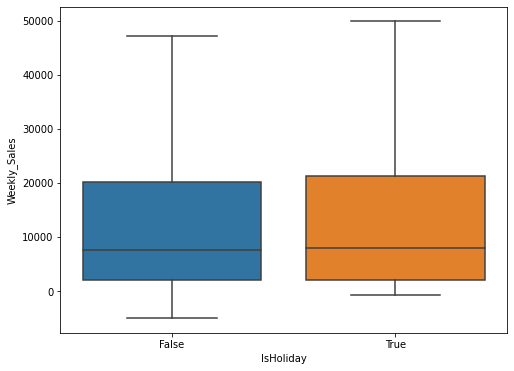

In [20]:
# boxplot for weekly sales for different types of stores
store_sale = pd.concat([merged_data['IsHoliday'], merged_data['Weekly_Sales']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=store_sale, showfliers=False)

[]

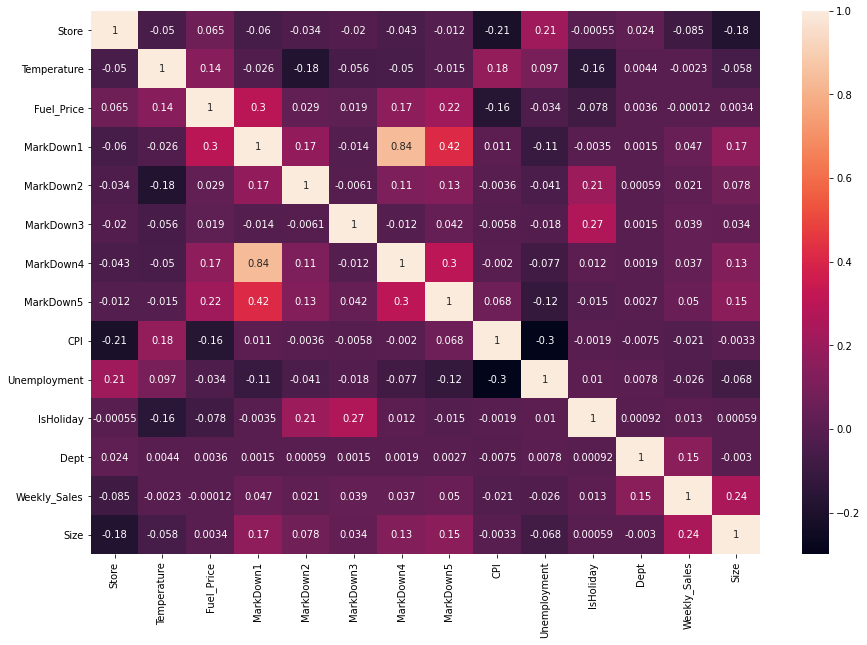

In [21]:
# Plotting correlation between all important features
corr = merged_data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)
plt.plot()

In [22]:
final_data = merged_data.copy()
final_test_data = merged_data.copy()

In [23]:
# Add column for year
final_data["Year"] = pd.to_datetime(final_data["Date"], format="%Y-%m-%d").dt.year
final_test_data["Year"] = pd.to_datetime(final_test_data["Date"], format="%Y-%m-%d").dt.year
# Add column for day
final_data["Day"] = pd.to_datetime(final_data["Date"], format="%Y-%m-%d").dt.day
final_test_data["Day"] = pd.to_datetime(final_test_data["Date"], format="%Y-%m-%d").dt.day
# Add column for days to next Christmas
final_data["Days to Next Christmas"] = (pd.to_datetime(final_data["Year"].astype(str)+"-12-31", format="%Y-%m-%d") -
                                   pd.to_datetime(final_data["Date"], format="%Y-%m-%d")).dt.days.astype(int)
final_test_data["Days to Next Christmas"] = (pd.to_datetime(final_test_data["Year"].astype(str) + "-12-31", format="%Y-%m-%d") -
                                   pd.to_datetime(final_test_data["Date"], format="%Y-%m-%d")).dt.days.astype(int)

In [24]:
tp = pd.get_dummies(final_data.Type)
final_data = pd.concat([final_data, tp], axis=1)
final_data = final_data.drop(columns='Type')

In [25]:
final_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,IsHoliday,Dept,Weekly_Sales,Size,Year,Day,Days to Next Christmas,A,B,C
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,...,False,1,24924.50,151315,2010,5,329,1,0,0
330761,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,...,False,3,14612.19,103681,2010,5,329,0,1,0
330762,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,...,False,4,26323.15,103681,2010,5,329,0,1,0
330763,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,...,False,5,36414.63,103681,2010,5,329,0,1,0
330764,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,...,False,6,11437.81,103681,2010,5,329,0,1,0


In [26]:
# Merge tables feature_data and train_data on common features.
merged_test_data = pd.merge(feature_data, test_data, on=['Store','Date','IsHoliday'])

merged_test_data = pd.merge(merged_data, store_data, on=['Store'])

In [27]:
merged_test_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type_x,Size_x,Type_y,Size_y
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50,A,151315,A,151315
1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,82,19484.03,A,151315,A,151315
2,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,59,1409.34,A,151315,A,151315
3,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,58,7659.97,A,151315,A,151315
4,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,56,2567.36,A,151315,A,151315


In [28]:
merged_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50,A,151315
330761,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,3,14612.19,B,103681
330762,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,4,26323.15,B,103681
330763,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,5,36414.63,B,103681
330764,35,2010-02-05,27.19,2.784,0.0,0.0,0.0,0.0,0.0,135.352461,9.262,False,6,11437.81,B,103681


In [29]:
store_data.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [30]:
final_data.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Dept', 'Weekly_Sales', 'Size', 'Year', 'Day',
       'Days to Next Christmas', 'A', 'B', 'C'],
      dtype='object')

In [38]:
X = final_data.copy()
X = X.drop(['Weekly_Sales', 'Date'], axis=1)

y = final_data[['Weekly_Sales']]

In [39]:
X.columns, y.columns

(Index(['Store', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
        'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
        'IsHoliday', 'Dept', 'Size', 'Year', 'Day', 'Days to Next Christmas',
        'A', 'B', 'C'],
       dtype='object'),
 Index(['Weekly_Sales'], dtype='object'))

In [40]:
#train-test split
# !pip install sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, random_state=0)

In [46]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [49]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10,n_jobs=4)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

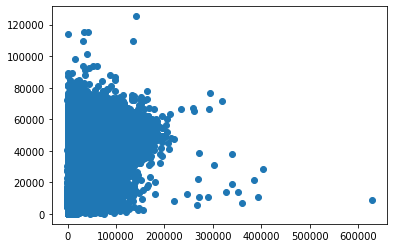

In [50]:
plt.scatter(y_test, y_pred)
plt.show()

In [51]:
from sklearn import metrics
import numpy as np
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

accuracy = knn.score(X_test, y_test)
print(accuracy)

12478.263981995875
416302383.91757816
20403.489503454504
0.19956184359959184


In [52]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

In [53]:
from sklearn import metrics
import numpy as np
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

accuracy = dt.score(X_test, y_test)
print(accuracy)

1757.297180539412
19623649.484282527
4429.858856022675
0.9622689698117204
